<img src= 'logo-full.png'>

### Implementación con técnicas de Machine Learning para la detección de fraudes en seguros automovilísticos en la Republica Dominicana, año 2022.

### Nestor Emmanuel Castillo Bello (2021-1246)

In [1]:
# Importar librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset Loading

In [2]:
# Cargar dataset
data=pd.read_excel("C:/Users/necas/OneDrive/Desktop/TCD/insurance_claims-base.xlsx")
data.head()

,Antigüedad,Edad,Numero_poliza,Fecha_ingreso_poliza,provincia_poliza,poliza_limite,poliza_deducible,policy_annual_premium,sexo_cliente,nivel_educativo,...,autoridades_contactada,ciudad_incidente,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,Marca_vehiculo,año_carro,fraude_reportado
0,328,48,521585,2014-10-17,Santo Domingo,5250/10500,53000,79566.23,Masculino,Maestria,...,Policia,Distrito Nacional,2,246338.4,117180.0,26040.0,103118.4,Saab,2004,Y
1,228,42,342868,2006-06-27,Santo Domingo,5250/10500,106000,68452.66,Masculino,Maestria,...,Policia,Distrito Nacional,0,22549.8,14040.0,1560.0,6949.8,Mercedes,2007,Y
2,134,29,687698,2000-09-06,Santo Domingo,2100/6300,106000,79896.42,Femenino,PhD,...,Policia,Distrito Nacional,3,192038.0,138600.0,7700.0,45738.0,Dodge,2007,N
3,256,41,227811,1990-05-25,Santo Domingo,5250/10500,106000,80034.22,Femenino,Bachillerato,...,Policia,Santo Domingo Este,2,227225.6,114120.0,12680.0,100425.6,Chevrolet,2014,Y
4,228,44,367455,2014-06-06,Santo Domingo,10500/21000,53000,88947.23,Masculino,Tecnico grado,...,Ninguno,Santo Domingo Este,1,33709.0,23400.0,1300.0,9009.0,Accura,2009,N


In [3]:
# info
data.shape

(1000, 26)

# Data cleaning

In [4]:
#Informaciones de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Antigüedad                1000 non-null   int64         
 1   Edad                      1000 non-null   int64         
 2   Numero_poliza             1000 non-null   int64         
 3   Fecha_ingreso_poliza      1000 non-null   datetime64[ns]
 4   provincia_poliza          1000 non-null   object        
 5   poliza_limite             1000 non-null   object        
 6   poliza_deducible          1000 non-null   int64         
 7   policy_annual_premium     1000 non-null   float64       
 8   sexo_cliente              1000 non-null   object        
 9   nivel_educativo           1000 non-null   object        
 10  ocupacion_cliente         1000 non-null   object        
 11  capital_ganancias         1000 non-null   int64         
 12  capital_perdida      

In [5]:
#Remplazar valores N/A 
data["propiedad_reclamacion"].fillna(0,inplace=True)
data["lesion_reclamacion"].fillna(0,inplace=True)

In [6]:
#Verificar los valores nulos
data.isnull().sum()

Antigüedad                  0
Edad                        0
Numero_poliza               0
Fecha_ingreso_poliza        0
provincia_poliza            0
poliza_limite               0
poliza_deducible            0
policy_annual_premium       0
sexo_cliente                0
nivel_educativo             0
ocupacion_cliente           0
capital_ganancias           0
capital_perdida             0
fecha_incidente             0
tipo_incidente              0
severidad_incidente         0
autoridades_contactada      0
ciudad_incidente            0
testigos                    0
cantidad_total_reclamada    0
lesion_reclamacion          0
propiedad_reclamacion       0
vehiculo_reclamacion        0
Marca_vehiculo              0
año_carro                   0
fraude_reportado            0
dtype: int64

# Analisis Exploratorio

In [8]:
#Media
data.mean()

C:\Users\necas\AppData\Local\Temp\ipykernel_13084\257693153.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()
C:\Users\necas\AppData\Local\Temp\ipykernel_13084\257693153.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Antigüedad                     203.95400
Edad                            38.94800
Numero_poliza               546238.64800
poliza_deducible             60208.00000
policy_annual_premium        71589.52595
capital_ganancias            45226.98000
capital_perdida             -53587.40000
testigos                         1.48700
cantidad_total_reclamada    223700.02100
lesion_reclamacion          133801.56000
propiedad_reclamacion        14799.14000
vehiculo_reclamacion         75099.32100
año_carro                     2005.10300
dtype: float64

In [9]:
#Correlacion
df= data.corr().T
df

,Antigüedad,Edad,Numero_poliza,poliza_deducible,policy_annual_premium,capital_ganancias,capital_perdida,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,año_carro
Antigüedad,1.000000,0.922098,0.057555,0.026807,0.005018,0.006399,0.020209,0.058383,0.067256,0.065329,0.034940,0.061013,-0.000292
Edad,0.922098,1.000000,0.059413,0.029188,0.014404,-0.007075,0.007368,0.052359,0.076951,0.075522,0.060898,0.062588,0.001354
Numero_poliza,0.057555,0.059413,1.000000,-0.006738,0.022566,0.009802,-0.005669,-0.012661,-0.013096,-0.008762,-0.010678,-0.020184,-0.000183
poliza_deducible,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.035212,-0.023544,0.066639,0.034263,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.013738,0.023547,0.002332,-0.007278,-0.017633,-0.011654,0.020246,-0.049226
capital_ganancias,0.006399,-0.007075,0.009802,0.035212,-0.013738,1.000000,-0.046904,-0.017651,0.023038,0.025934,-0.000779,0.015836,0.031398
capital_perdida,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.046904,1.000000,-0.041330,-0.044166,-0.046060,-0.022863,-0.032665,-0.056615
testigos,0.058383,0.052359,-0.012661,0.066639,0.002332,-0.017651,-0.041330,1.000000,-0.020265,-0.024843,0.052640,-0.022564,0.045791
cantidad_total_reclamada,0.067256,0.076951,-0.013096,0.034263,-0.007278,0.023038,-0.044166,-0.020265,1.000000,0.968245,0.696556,0.868781,-0.023693
lesion_reclamacion,0.065329,0.075522,-0.008762,0.039107,-0.017633,0.025934,-0.046060,-0.024843,0.968245,1.000000,0.563866,0.722878,-0.013718


<AxesSubplot:>

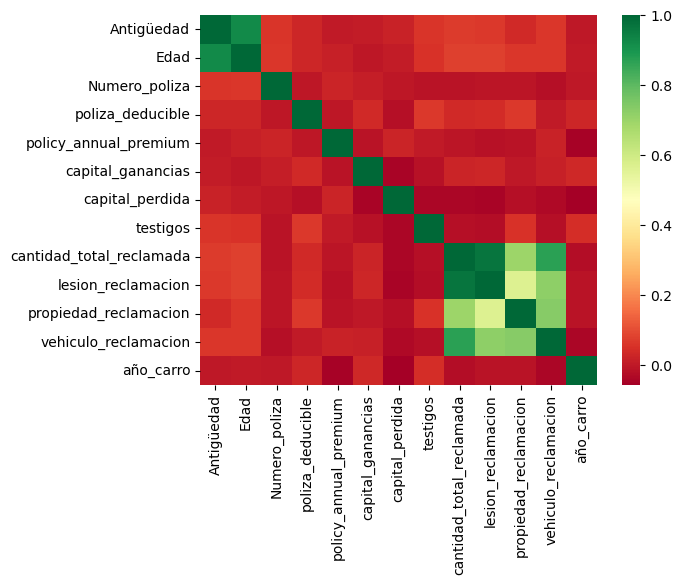

In [10]:
#Mapa de calor 
sns.heatmap(df, xticklabels=df.columns.values,yticklabels=df.columns.values, cmap='RdYlGn')

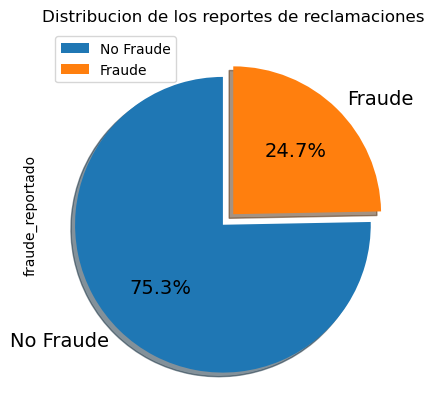

,fraude_reportado
N,753
Y,247


In [11]:
#Distribucion de los reportes de reclamaciones en seguros de automoviles
dtc = pd.DataFrame(data['fraude_reportado'].value_counts())

labels = 'No Fraude','Fraude'
dtc.reset_index(inplace=True)
              
dtc.plot(kind='pie', y='fraude_reportado', title= 'Distribucion de los reportes de reclamaciones', labels=labels, autopct='%1.1f%%',
         explode=(0.1, 0,), shadow=True, startangle=450, fontsize=14)   

plt.show()
dtc=pd.DataFrame(data['fraude_reportado'].value_counts())
dtc

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


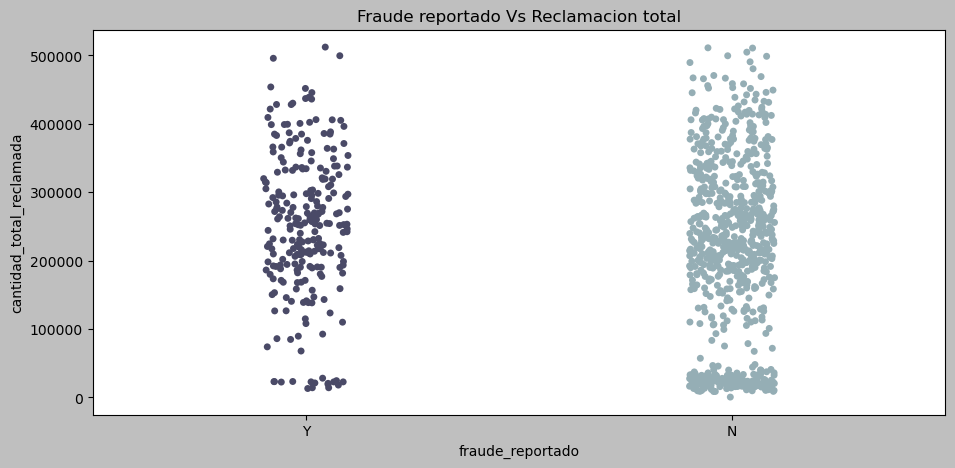

In [12]:
plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = (11,5)
sns.stripplot(data['fraude_reportado'], data['cantidad_total_reclamada'], 
              palette= 'bone')
plt.title('Fraude reportado Vs Reclamacion total')
plt.show()

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


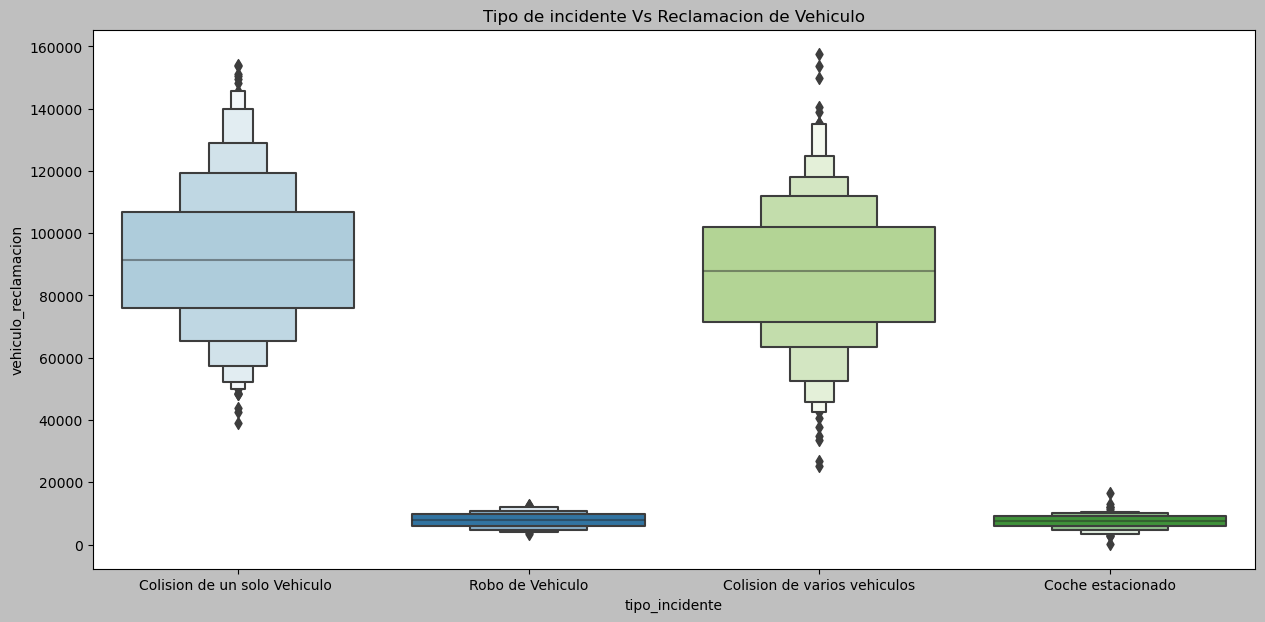

In [13]:
plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = (15,7)
sns.boxenplot(data['tipo_incidente'], data['vehiculo_reclamacion'], 
              palette= 'Paired')
plt.title('Tipo de incidente Vs Reclamacion de Vehiculo')
plt.show()

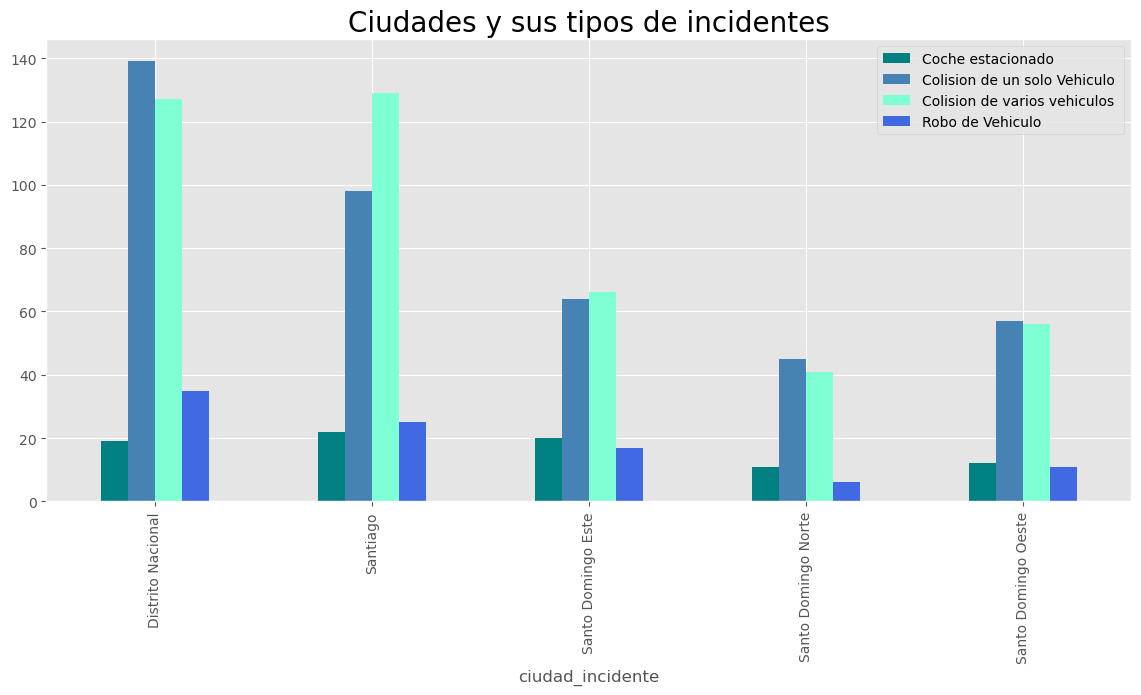

In [14]:
#Ciudades y sus tipos de incidentes
plt.style.use('ggplot')
incidente = pd.crosstab(data['ciudad_incidente'], data ['tipo_incidente'])
colors = ['Teal','Steelblue','Aquamarine','RoyalBlue']
incidente.plot(kind= 'bar',stacked= False,figsize=(14,6), color= colors)
plt.title('Ciudades y sus tipos de incidentes', fontsize = 20)
plt.legend()
plt.show()

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


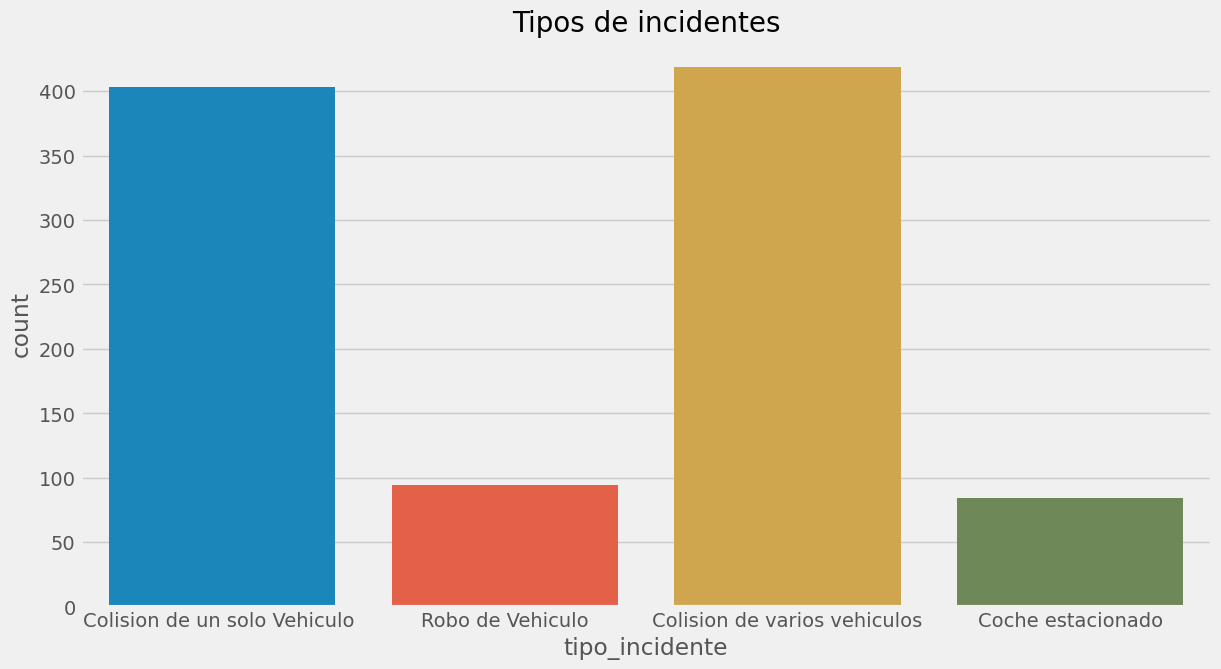

In [15]:
#Tipos de incidentes
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)


sns.countplot(data['tipo_incidente'])
plt.title('Tipos de incidentes', fontsize = 20)

plt.show()

## Analisis de comportamiento fraudulento


In [16]:
# Dataframe de reportes de fraude
fraude = data[data['fraude_reportado'] == 'Y']
fraude

,Antigüedad,Edad,Numero_poliza,Fecha_ingreso_poliza,provincia_poliza,poliza_limite,poliza_deducible,policy_annual_premium,sexo_cliente,nivel_educativo,...,autoridades_contactada,ciudad_incidente,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,Marca_vehiculo,año_carro,fraude_reportado
0,328,48,521585,2014-10-17,Santo Domingo,5250/10500,53000,79566.23,Masculino,Maestria,...,Policia,Distrito Nacional,2,246338.4,117180.0,26040.0,103118.4,Saab,2004,Y
1,228,42,342868,2006-06-27,Santo Domingo,5250/10500,106000,68452.66,Masculino,Maestria,...,Policia,Distrito Nacional,0,22549.8,14040.0,1560.0,6949.8,Mercedes,2007,Y
3,256,41,227811,1990-05-25,Santo Domingo,5250/10500,106000,80034.22,Femenino,Bachillerato,...,Policia,Santo Domingo Este,2,227225.6,114120.0,12680.0,100425.6,Chevrolet,2014,Y
5,256,39,104594,2006-10-12,Santo Domingo,5250/10500,53000,76608.30,Femenino,PhD,...,Bomberos,Santo Domingo Este,2,229734.4,115380.0,12820.0,101534.4,Saab,2003,Y
14,180,38,644081,1998-12-28,Santo Domingo,5250/10500,106000,73959.89,Femenino,Universitario,...,Policia,Distrito Nacional,2,158928.0,75600.0,16800.0,66528.0,Dodge,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,1990-05-16,Santo Domingo,2100/6300,26500,55432.68,Masculino,Maestria,...,Policia,Distrito Nacional,1,436968.0,272160.0,15120.0,149688.0,Chevrolet,2007,Y
977,266,42,929306,2003-03-06,Santo Domingo,2100/10500,26500,62972.99,Masculino,Universitario,...,Ambulancia,Distrito Nacional,1,176800.8,79920.0,17760.0,79120.8,Suburu,2015,Y
982,230,43,490514,2007-02-09,Santo Domingo,10500/21000,106000,63396.99,Masculino,Universitario,...,Policia,Santo Domingo Este,3,186113.4,93420.0,20760.0,71933.4,BMW,2011,Y
986,232,42,182953,2013-04-30,Santo Domingo,2100/10500,26500,55033.59,Masculino,Universitario,...,Otro,Distrito Nacional,3,399322.0,277200.0,15400.0,106722.0,Toyota,2015,Y


C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


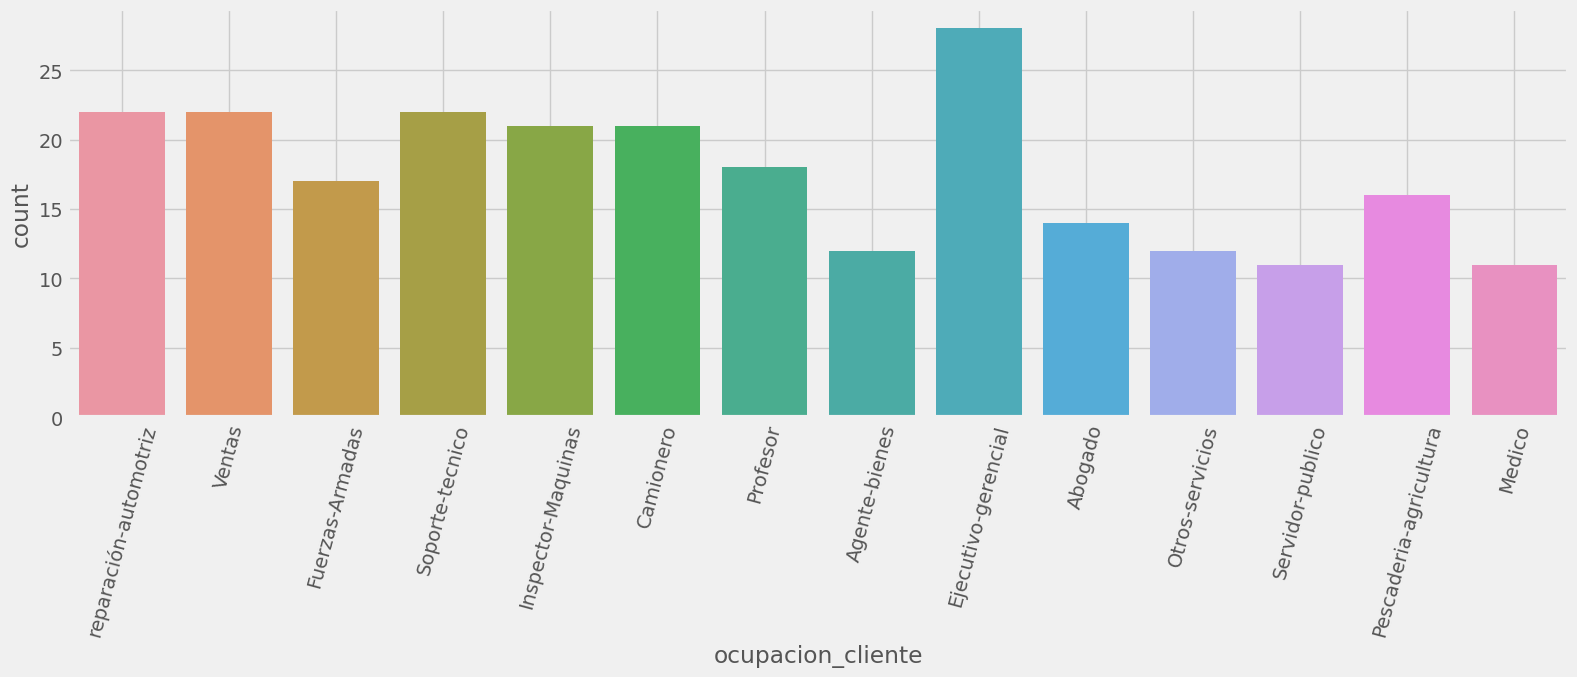

In [17]:
#Ocupacion de los clientes fraudulentos
plt.style.use('seaborn-bright')
plt.figure(figsize=(16,7))
sns.countplot('ocupacion_cliente', data= fraude)
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

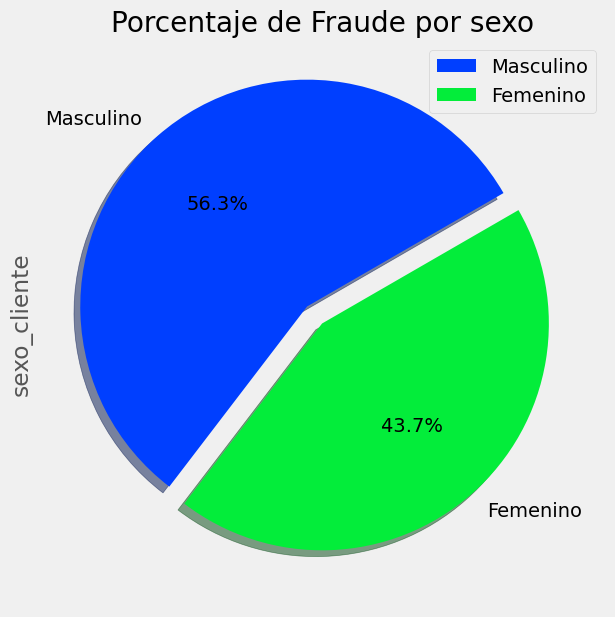

,sexo_cliente
Masculino,139
Femenino,108


In [18]:
# Porcentaje de fraude por sexo
fraude1 = pd.DataFrame(fraude['sexo_cliente'].value_counts())
fraude1.reset_index(inplace=True)
              
fraude1.plot(kind='pie',y='sexo_cliente', title= 'Porcentaje de Fraude por sexo',labels=fraude1['index'], autopct='%1.1f%%',explode=(0.1, 0,), 
             shadow=True, startangle=390, fontsize=14)      

plt.show()
fraude1=pd.DataFrame(fraude['sexo_cliente'].value_counts())
fraude1

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


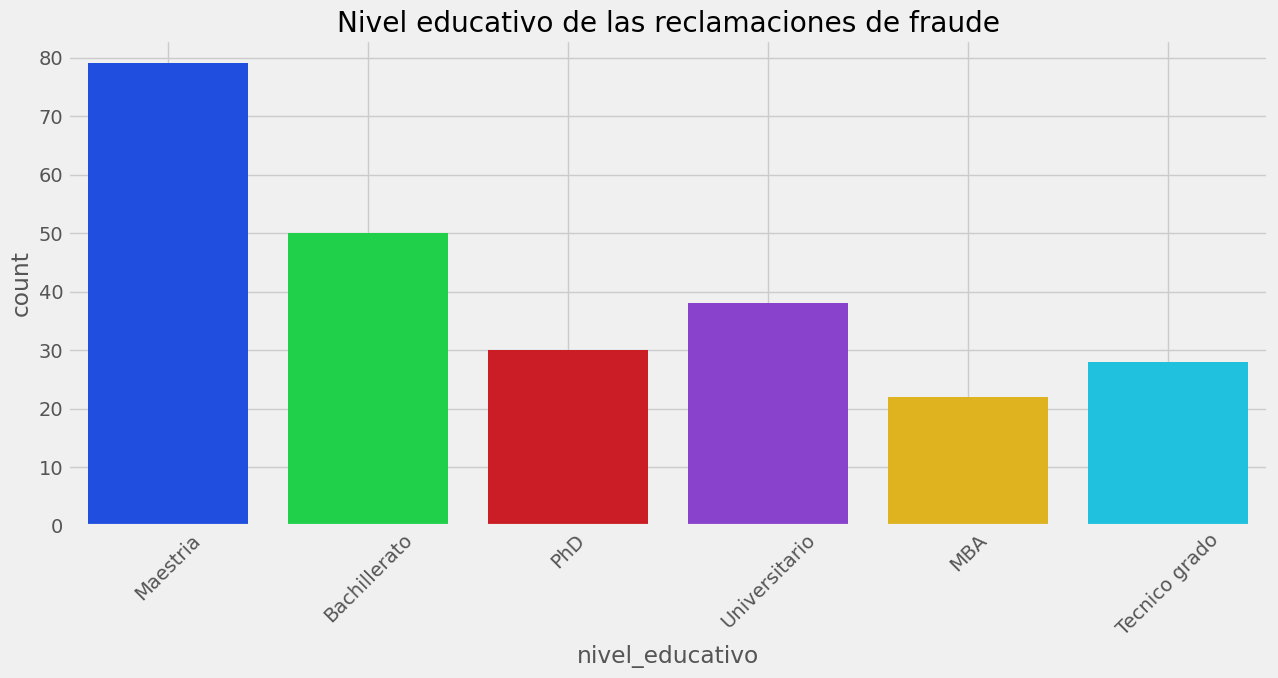

,nivel_educativo
Maestria,79
Bachillerato,50
Universitario,38
PhD,30
Tecnico grado,28
MBA,22


In [19]:
# Nivel educativo de las reclamaciones de fraude
plt.style.use('seaborn-bright')
plt.figure(figsize=(13,7))

sns.countplot('nivel_educativo', data= fraude)
plt.xticks(rotation=45)
plt.title('Nivel educativo de las reclamaciones de fraude')
plt.grid(True)
plt.tight_layout()
plt.show()

ed=pd.DataFrame(fraude['nivel_educativo'].value_counts())
ed

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


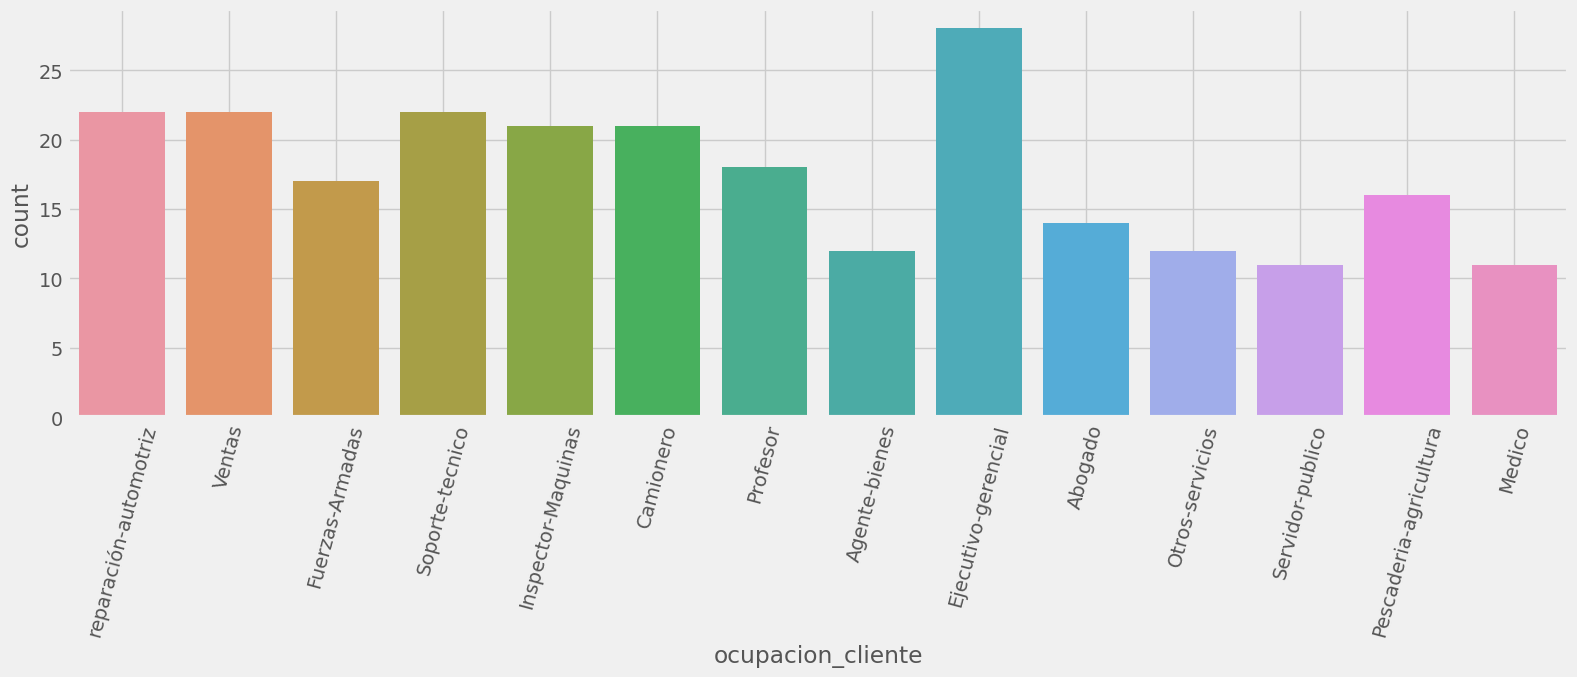

In [20]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(16,7))
sns.countplot('ocupacion_cliente', data= fraude)
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

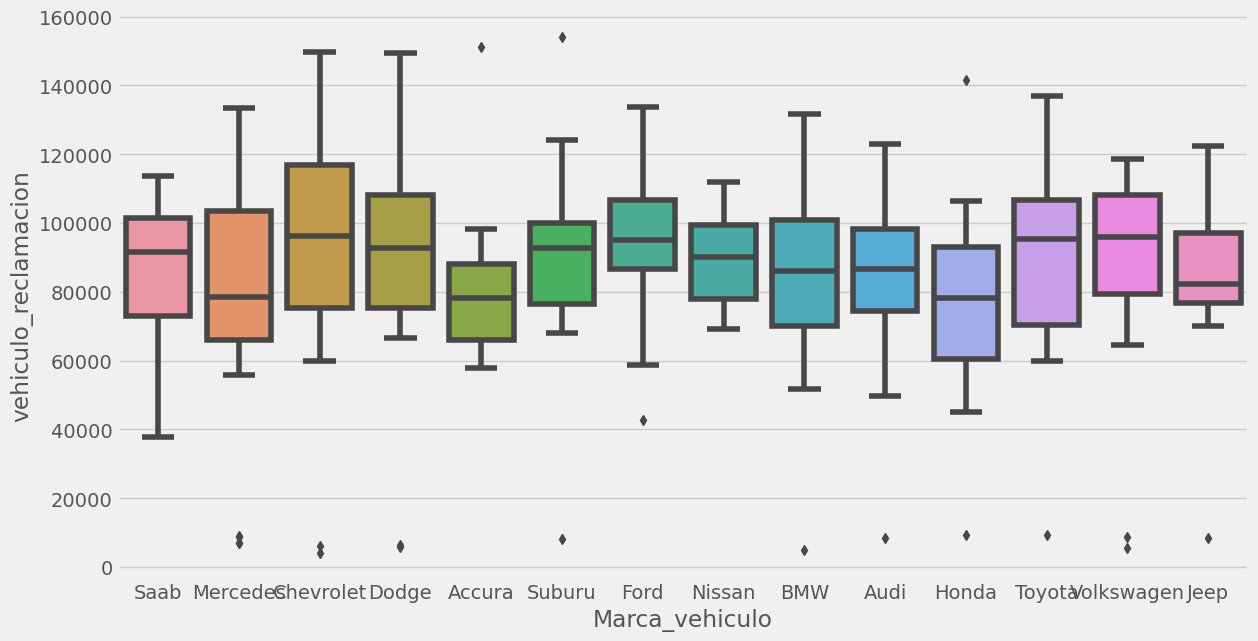

In [21]:
sns.boxplot(x='Marca_vehiculo', y='vehiculo_reclamacion',data=fraude)
plt.show()

In [22]:
# Marcas con mas probabilidad de cometer fraude
mv=pd.DataFrame(fraude['Marca_vehiculo'].value_counts(normalize=True))
mv.head(10)

,Marca_vehiculo
Mercedes,0.089069
Ford,0.089069
Chevrolet,0.085020
Audi,0.085020
Dodge,0.080972
BMW,0.080972
Suburu,0.076923
Volkswagen,0.076923
Saab,0.072874
Nissan,0.056680


In [23]:
# Edades con mas probabilidad de fraude
edad=pd.DataFrame(fraude['Edad'].value_counts(normalize=True))
edad.head(10)

,Edad
41,0.064777
31,0.056680
34,0.052632
33,0.048583
32,0.044534
43,0.044534
38,0.044534
37,0.040486
39,0.040486
29,0.040486


# Prediccion de Fraudes mediante Tecnicas de Machine Learning

In [24]:
# Splitting traing data
X = data.iloc[:, 1: 25].values
y = data.iloc[:, 25].values
print(X.shape)
print(y.shape)

(1000, 24)
(1000,)


In [25]:
data_categorial = data.select_dtypes(include=["object","datetime64[ns]"])
categories = list(data_categorial.columns)
categories

['Fecha_ingreso_poliza',
 'provincia_poliza',
 'poliza_limite',
 'sexo_cliente',
 'nivel_educativo',
 'ocupacion_cliente',
 'fecha_incidente',
 'tipo_incidente',
 'severidad_incidente',
 'autoridades_contactada',
 'ciudad_incidente',
 'Marca_vehiculo',
 'fraude_reportado']

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

for i in categories:
    data[i] = labelencoder_X.fit_transform(data[i])

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (666, 24)
shape of X_test:  (334, 24)
shape of y_train:  (666,)
shape of y_test:  (334,)


In [28]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [29]:
for i in range(0, 23):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

X_train[:,23] = labelencoder_X.fit_transform(X_train[:,23])

In [30]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [31]:
X_train

array([[19, 214, 308, ..., 29, 12, 5],
       [11, 293, 405, ..., 302, 4, 11],
       [15, 456, 178, ..., 106, 2, 16],
       ...,
       [27, 587, 622, ..., 289, 5, 4],
       [18, 432, 547, ..., 215, 12, 16],
       [27, 245, 597, ..., 114, 0, 1]], dtype=object)

In [32]:
y_train

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
for i in range(0, 23):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,23] = labelencoder_X.fit_transform(X_test[:,23])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [34]:
X_test

array([[7, 220, 178, ..., 191, 13, 17],
       [9, 321, 299, ..., 105, 11, 10],
       [14, 73, 294, ..., 33, 9, 8],
       ...,
       [23, 263, 216, ..., 94, 7, 15],
       [21, 12, 248, ..., 171, 5, 11],
       [3, 238, 141, ..., 133, 12, 4]], dtype=object)

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# PCA

In [36]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.1422788  0.06135849]


# Classification Algorithms
## Logistic Regression

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7514970059880239


              precision    recall  f1-score   support

           0       0.75      1.00      0.86       251
           1       0.00      0.00      0.00        83

    accuracy                           0.75       334
   macro avg       0.38      0.50      0.43       334
weighted avg       0.56      0.75      0.64       334



C:\Users\necas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\necas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\necas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

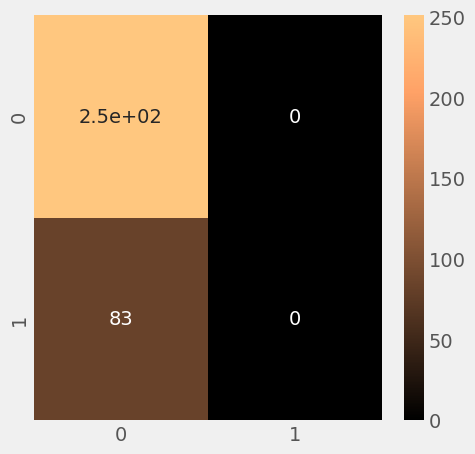

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, cmap = 'copper')
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


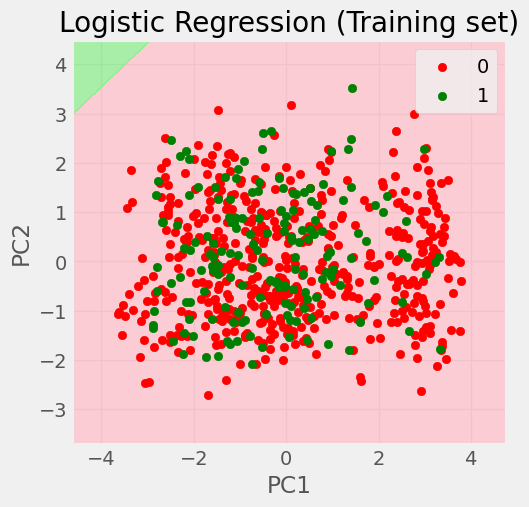

In [42]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


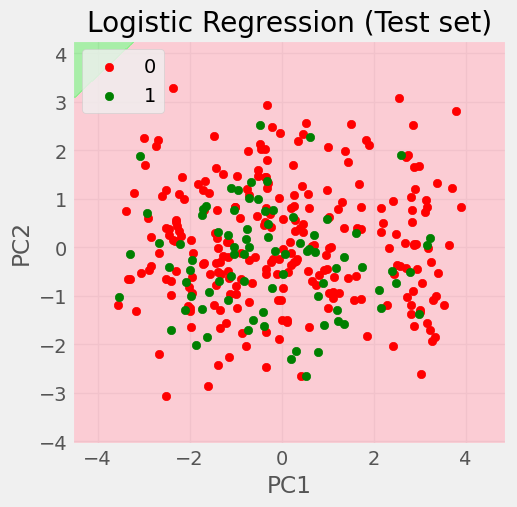

In [43]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## K-NN

In [44]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\necas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.6916167664670658


In [48]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[221  30]
 [ 73  10]]


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       251
           1       0.25      0.12      0.16        83

    accuracy                           0.69       334
   macro avg       0.50      0.50      0.49       334
weighted avg       0.63      0.69      0.65       334



<function matplotlib.pyplot.show(close=None, block=None)>

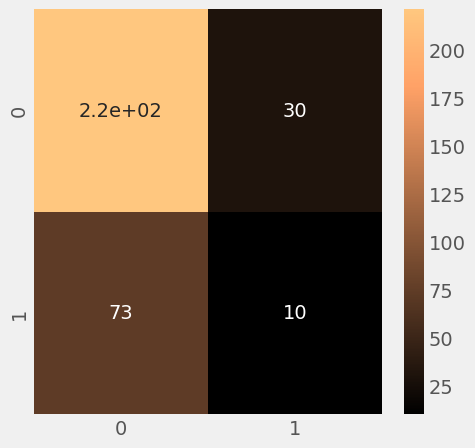

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, cmap = 'copper')
plt.show

C:\Users\necas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

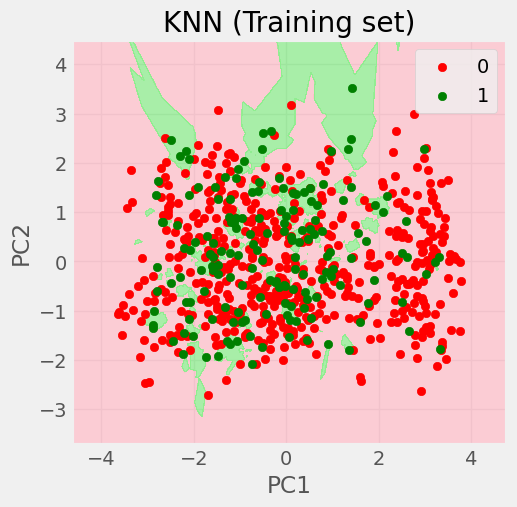

In [50]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\necas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

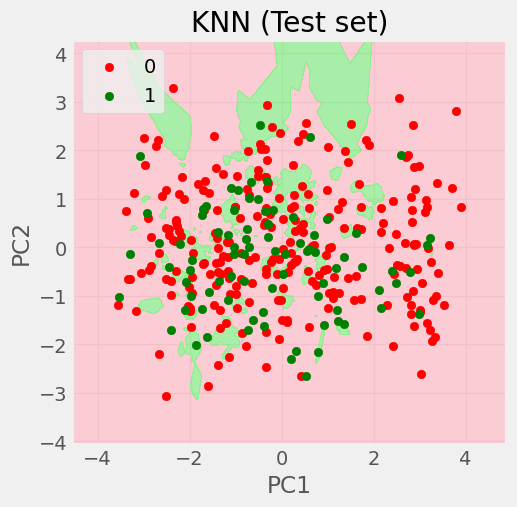

In [51]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Decision Tree

In [52]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [54]:

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree Classifier is:  0.6497005988023952


In [55]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[194  57]
 [ 60  23]]


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       251
           1       0.29      0.28      0.28        83

    accuracy                           0.65       334
   macro avg       0.53      0.53      0.53       334
weighted avg       0.65      0.65      0.65       334



<function matplotlib.pyplot.show(close=None, block=None)>

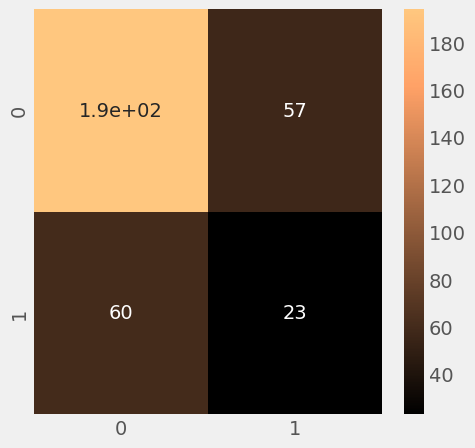

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, cmap = 'copper')
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


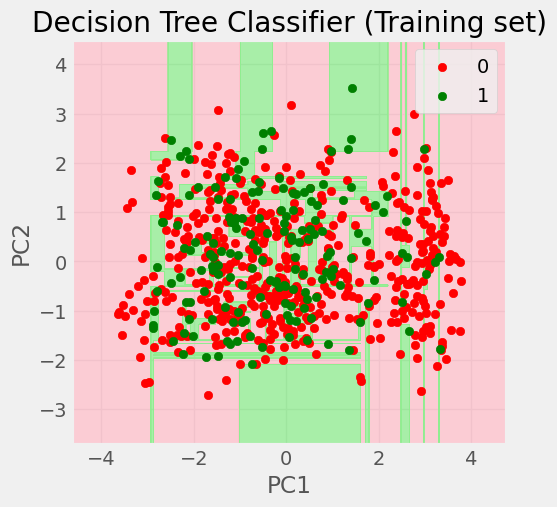

In [57]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


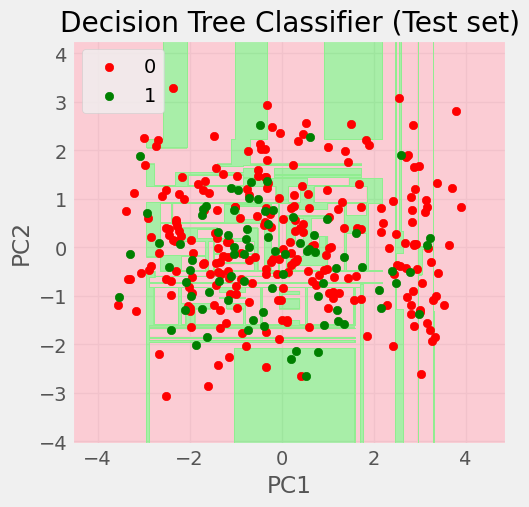

In [58]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# RANDOM FOREST

In [59]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [62]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest Classification is:  0.6916167664670658


In [63]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[221  30]
 [ 73  10]]


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       251
           1       0.25      0.12      0.16        83

    accuracy                           0.69       334
   macro avg       0.50      0.50      0.49       334
weighted avg       0.63      0.69      0.65       334



<function matplotlib.pyplot.show(close=None, block=None)>

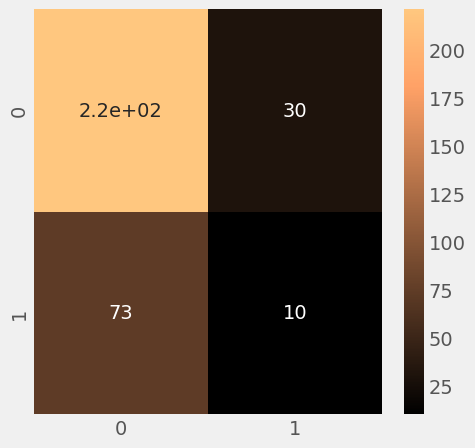

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, cmap = 'copper')
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


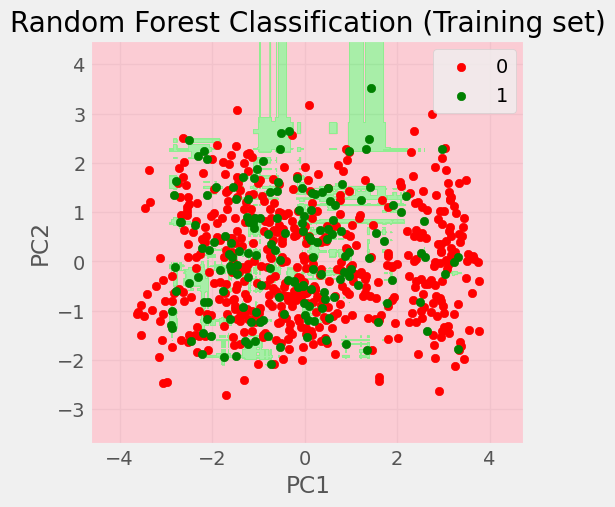

In [65]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


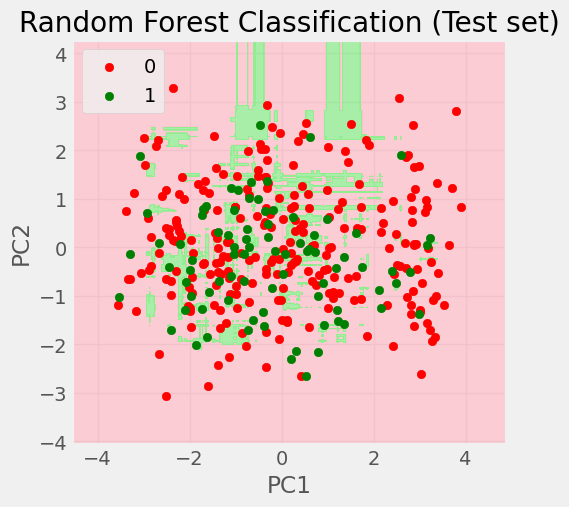

In [66]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Resultados:
La precision de Logistic Regression es: 75.14 %

La precision de KNN es: 69.16 %

La precision de Decision Tree Classifier es: 64.97 %

La precision de Random Forest Classification es: 69.16 %

 